# Regularized logistic regression (online vs. refit)

In [1]:
import json
import autograd.numpy as np
from autograd import value_and_grad
import scipy.optimize as scopt
import matplotlib.pyplot as plt
from scipy.special import expit
from functools import partial
from tqdm.notebook import tqdm

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 15
})

## Construct a logistic model

A map from feature space to $[0, 1]$

In [3]:
sigmoid = expit  # whenever I see "expit", I wrongly thinks it's the exponential function

In [4]:
xs = np.linspace(-2, 2, 100)  # for simplicity, assume the feature space is 1-dimensional

In [5]:
true_w = 10

In [6]:
ground_truth = sigmoid(true_w * xs)  # ground_truth is an array of probabilities

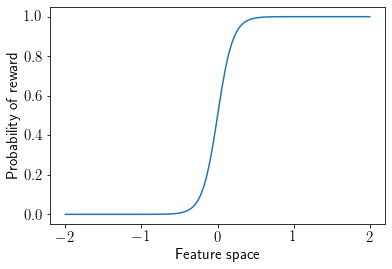

In [7]:
plt.plot(xs, ground_truth)
plt.xlabel('Feature space')
plt.ylabel('Probability of reward')
plt.show()

## Generate synthetic data from model

In [8]:
N = 10000

In [9]:
np.random.seed(42)

inputs = np.random.uniform(-2, 2, size=(N, ))  # sampling some "feature 1-d vectors"

targets = []
for i in range(N):
    p = sigmoid(true_w * inputs[i])
    targets.append(np.random.choice([0, 1], p=[1-p, p]))  # sampling corresponding "rewards"

targets = np.array(targets)

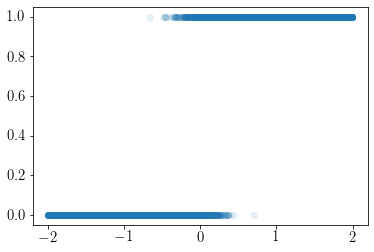

In [10]:
plt.scatter(inputs, targets, alpha=0.1)
plt.show()

## Use regularized logistic regression to recover true coefficient value

Some code blocks were commented out to prevent accidental re-run. Results have been saved in JSONs for convenience.

There are 2 experiments:
- $\lambda=0.01$: just to see whether my implementation is correct, i.e., with such large variance of the prior, we would expect that both online and refit recover the true coefficient without problem; it turns out that refit can do this **but online cannot (which is weird)**
- $\lambda=100$: high regularization; similar observation, i.e., online yields smaller $m$ (mean) and smaller $1/q$ (variance) at any given timestep, compared to refit

In [11]:
def log_prob_and_gradient_given_everything(m, q, x, y, w):

    # first term of the objective function
    c1 = 0.5 * np.sum( q * (w - m) ** 2 )

    # second term
    c2 = np.sum(np.logaddexp(0, - y * (w * x)))

    return c1 + c2

In [12]:
# λ = 100

# ms = []
# qs = []

# for i in tqdm(range(N)):
    
#     w = 0
#     m = 0
#     q = λ * 1
    
#     log_prob_and_gradient_w = partial(log_prob_and_gradient_given_everything, m, q, inputs[:i+1], targets[:i+1])
#     grad_logpost = value_and_grad(log_prob_and_gradient_w)
    
#     result = scopt.minimize(grad_logpost, w,
#             method='l-bfgs-b', jac=True, options={
#             'maxiter': 100, 'disp': False})

#     w = float(result.x)
    
#     m = w
    
#     p = sigmoid(w * inputs[:i+1])
#     q += np.sum((inputs[:i+1] ** 2) * p * (1 - p))
    
#     ms.append(m)
#     qs.append(q)
    
# ms_refit = np.array(ms)
# qs_refit = np.array(qs)

In [13]:
# with open('ms_refit.json', 'w+') as json_f:
#     json.dump(ms_refit.tolist(), json_f)
# with open('qs_refit.json', 'w+') as json_f:
#     json.dump(qs_refit.tolist(), json_f)

In [14]:
# with open('ms_refit_lambda100.json', 'w+') as json_f:
#     json.dump(ms_refit.tolist(), json_f)
# with open('qs_refit_lambda100.json', 'w+') as json_f:
#     json.dump(qs_refit.tolist(), json_f)

In [15]:
with open('ms_refit.json', 'r') as json_f:
    ms_refit = np.array(json.load(json_f))
with open('qs_refit.json', 'r') as json_f:
    qs_refit = np.array(json.load(json_f))
    
with open('ms_refit_lambda100.json', 'r') as json_f:
    ms_refit_lambda100 = np.array(json.load(json_f))
with open('qs_refit_lambda100.json', 'r') as json_f:
    qs_refit_lambda100 = np.array(json.load(json_f))

In [16]:
# λ = 100
# w = 0
# m = 0
# q = λ * 1

# ms = []
# qs = []

# for i in tqdm(range(N)):
    
#     inp = inputs[i]
#     target = targets[i]
    
#     log_prob_and_gradient_w = partial(log_prob_and_gradient_given_everything, m, q, inp, target)
#     grad_logpost = value_and_grad(log_prob_and_gradient_w)
    
#     result = scopt.minimize(grad_logpost, w,
#             method='l-bfgs-b', jac=True, options={
#             'maxiter': 100, 'disp': False})

#     w = float(result.x)
    
#     m = w
    
#     p = sigmoid(w * inp)
#     q += np.sum((inp ** 2) * p * (1 - p))
    
#     ms.append(m)
#     qs.append(q)
    
# ms_online = np.array(ms)
# qs_online = np.array(qs)

In [17]:
# with open('ms_online.json', 'w+') as json_f:
#     json.dump(ms_online.tolist(), json_f)
# with open('qs_online.json', 'w+') as json_f:
#     json.dump(qs_online.tolist(), json_f)

In [18]:
# with open('ms_online_lambda100.json', 'w+') as json_f:
#     json.dump(ms_online.tolist(), json_f)
# with open('qs_online_lambda100.json', 'w+') as json_f:
#     json.dump(qs_online.tolist(), json_f)

In [19]:
with open('ms_online.json', 'r') as json_f:
    ms_online = np.array(json.load(json_f))
with open('qs_online.json', 'r') as json_f:
    qs_online = np.array(json.load(json_f))
    
with open('ms_online_lambda100.json', 'r') as json_f:
    ms_online_lambda100 = np.array(json.load(json_f))
with open('qs_online_lambda100.json', 'r') as json_f:
    qs_online_lambda100 = np.array(json.load(json_f))

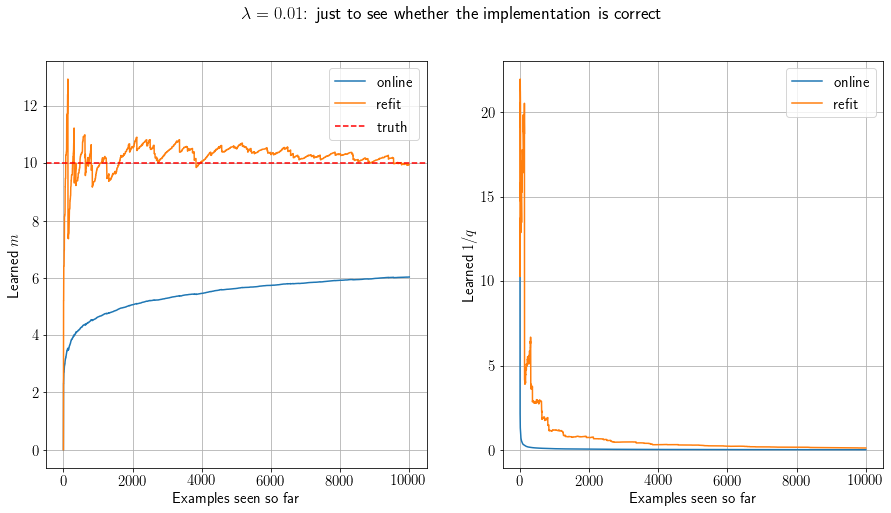

In [20]:
fig = plt.figure(figsize=(15, 7.5))

fig.add_subplot(121)
plt.plot(ms_online, label='online')
plt.plot(ms_refit, label='refit')
plt.axhline(10, linestyle='--', color='red', label='truth')

plt.xlabel('Examples seen so far')
plt.ylabel('Learned $m$')

plt.legend()
plt.grid()

fig.add_subplot(122)
plt.plot(1/qs_online, label='online')
plt.plot(1/qs_refit, label='refit')

plt.xlabel('Examples seen so far')
plt.ylabel('Learned $1/q$')

plt.legend()
plt.grid()

plt.suptitle('$\lambda=0.01$: just to see whether the implementation is correct')

plt.show()

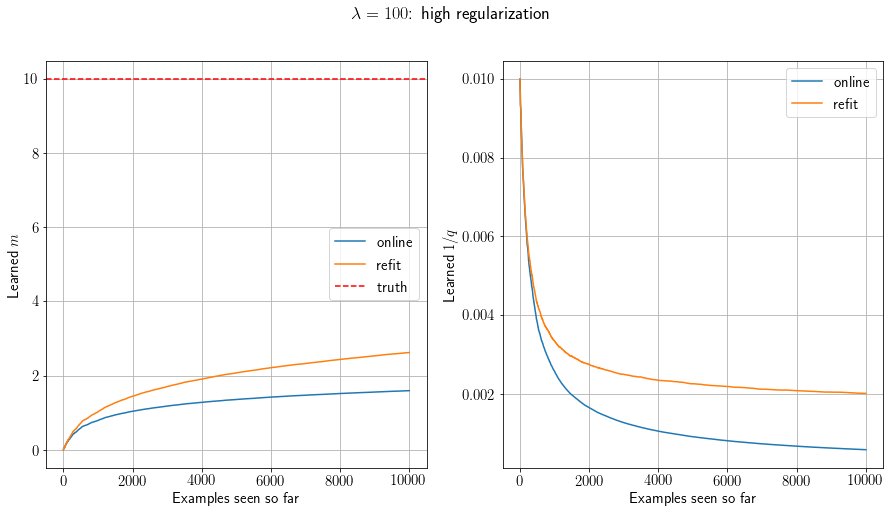

In [21]:
fig = plt.figure(figsize=(15, 7.5))

fig.add_subplot(121)
plt.plot(ms_online_lambda100, label='online')
plt.plot(ms_refit_lambda100, label='refit')
plt.axhline(10, linestyle='--', color='red', label='truth')

plt.xlabel('Examples seen so far')
plt.ylabel('Learned $m$')

plt.legend()
plt.grid()

fig.add_subplot(122)
plt.plot(1/qs_online_lambda100, label='online')
plt.plot(1/qs_refit_lambda100, label='refit')

plt.xlabel('Examples seen so far')
plt.ylabel('Learned $1/q$')

plt.legend()
plt.grid()

plt.suptitle('$\lambda=100$: high regularization')

plt.show()